# DBScan 

***Importing Libraries***

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

***Loading The Data Set***



In [15]:
data = pd.read_csv('Data/new_dataset.csv', index_col=0, decimal='.')
scaler = MinMaxScaler()
data_frame_transformed = scaler.fit_transform(data.values)

***Parameters:***


*   **epsilon:** The maximum distance between two samples for them to be considered as in the same neighborhood.
*   **min_pts:** The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself. min_pts was set to twice the dimension of our dataset. 




In [16]:
min_pts = data.shape[1] * 2

I exploited the Elbow/Knee Method, to find the best value for eps

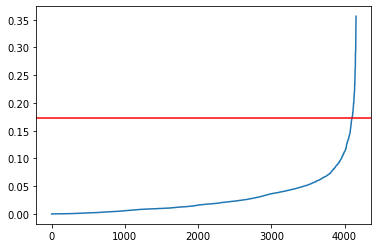

In [48]:
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(data_frame_transformed)
distances, indices = neighbors_fit.kneighbors(data_frame_transformed)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
kneedle = KneeLocator(range(distances.shape[0]), distances, S=1.0, curve="convex", direction="increasing")
plt.plot(range(distances.shape[0]), distances)
epsilon = kneedle.knee_y
plt.axhline(y=epsilon, color='r', linestyle='-', label="epsilon")
plt.show()

In [49]:
dbscan = DBSCAN(eps=eps, min_samples=min_pts)
dbscan.fit(data_frame_transformed)

DBSCAN(eps=0.17229769941409642, min_samples=12)

In [50]:
labels, counts = np.unique(dbscan.labels_, return_counts=True)

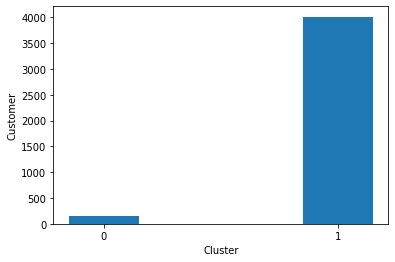

144


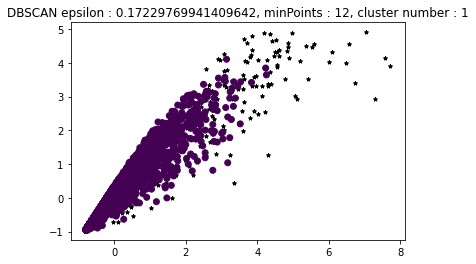

In [51]:
plt.bar(x=range(len(counts)), height=counts, width=0.3)
plt.xticks(np.arange(2))
plt.xlabel("Cluster")
plt.ylabel("Customer")
plt.show()

def draw_plot(cluster_arr, cluster_num, eps, min_points):
    data_frame = pd.DataFrame()
    data_frame['x'] = arr[:, 0]
    data_frame['y'] = arr[:, 1]
    data_frame['cluster_arr'] = cluster_arr
    count = 0
    for i in range(len(cluster_arr)):
        if cluster_arr[i] == -1:
            count = count + 1
    print(count)
    plt.title("DBSCAN epsilon : {}, minPoints : {}, cluster number : {}".format(eps, min_points, cluster_num - 1))
    plt.scatter(data_frame['x'][cluster_arr == -1], data_frame['y'][cluster_arr == -1], s=15, marker='*', c='black')
    plt.scatter(data_frame['x'][cluster_arr != -1], data_frame['y'][cluster_arr != -1], marker='o', c=cluster_arr[cluster_arr != -1])
    plt.show();

draw_plot(dbscan.labels_,len(counts),epsilon,min_pts)

DBScan that I implemented myself

In [52]:
def find_neighbor(n, arr, epsilon):
    dist = np.sqrt(np.sum((arr-n)**2, axis=1))
    return np.where(dist <= epsilon)[0]


def get_random_list(arr):
    random_list = np.random.choice(arr.shape[0], size=arr.shape[0], replace=False)
    random_list = random_list.tolist()
    return random_list


def region_query(arr, epsilon, minPoint):
    region_list = []
    for i in range(len(arr)):
        region = find_neighbor(arr[i], arr, epsilon)
        if len(region) >= minPoint:
            region_list.append(1)
        else:
            region_list.append(0)
    return region_list


def db_scan_algorithm(arr, epsilon, minPoint):
    cluster_number = 1
    cluster_array = np.empty(arr.shape[0])
    cluster_array.fill(-1)
    random_list = get_random_list(arr)
    neighborhoods = region_query(arr, epsilon, minPoint)
    while len(random_list) != 0:
        random_element_index = random_list.pop(0)
        if neighborhoods[random_element_index] == 1:
            neighbor_list = (find_neighbor(arr[random_element_index], arr, epsilon)).tolist()
            for p in neighbor_list:
                if p == random_element_index:
                    neighbor_list.remove(p)
            cluster_array[random_element_index] = cluster_number
            cluster_array[neighbor_list] = cluster_number
            while len(neighbor_list) != 0:
                p0_index = neighbor_list.pop(0)
                if neighborhoods[p0_index] == 1:
                    if p0_index in random_list:
                        random_list.remove(p0_index)
                        second_neighbor_list = (find_neighbor(arr[p0_index], arr, epsilon)).tolist()
                        for p in second_neighbor_list:
                            if p == p0_index:
                                second_neighbor_list.remove(p)
                        cluster_array[p0_index] = cluster_number
                        cluster_array[second_neighbor_list] = cluster_number
                        for p in second_neighbor_list:
                            if p not in neighbor_list:
                                neighbor_list.append(p)
            cluster_number += 1
    return cluster_array, cluster_number


# My DBScan Algorithm Test
Epsilon value that I find with the Knee Method

Number of cluster detected:  1
144


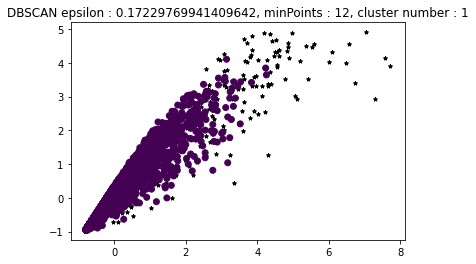

In [53]:
cluster_arr, cluster_num = db_scan_algorithm(data_frame_transformed, epsilon, min_pts)
print("Number of cluster detected: ", cluster_num - 1)
draw_plot(cluster_arr, cluster_num, epsilon, min_pts)

Epsilon = 0.05

Number of cluster detected:  1
1384


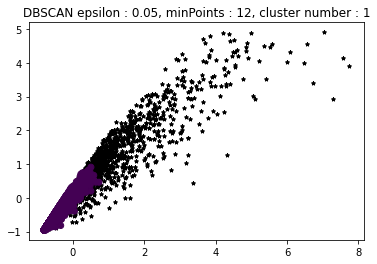

In [54]:
epsilon = 0.05
cluster_arr, cluster_num = db_scan_algorithm(data_frame_transformed, epsilon, min_pts)
print("Number of cluster detected: ", cluster_num - 1)
draw_plot(cluster_arr, cluster_num, epsilon, min_pts)

Epsilon = 0.1

Number of cluster detected:  1
471


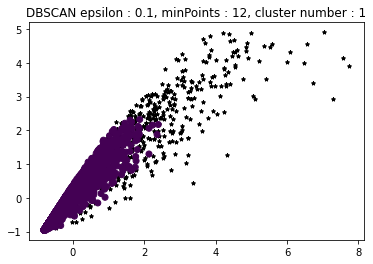

In [55]:
epsilon = 0.1
cluster_arr, cluster_num = db_scan_algorithm(data_frame_transformed, epsilon, min_pts)
print("Number of cluster detected: ", cluster_num - 1)
draw_plot(cluster_arr, cluster_num, epsilon, min_pts)

Epsilon = 0.15

Number of cluster detected:  1
220


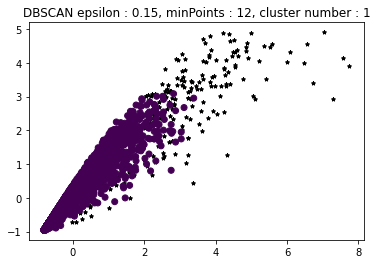

In [56]:
epsilon = 0.15
cluster_arr, cluster_num = db_scan_algorithm(data_frame_transformed, epsilon, min_pts)
print("Number of cluster detected: ", cluster_num - 1)
draw_plot(cluster_arr, cluster_num, epsilon, min_pts)

Epsilon = 0.2

Number of cluster detected:  1
85


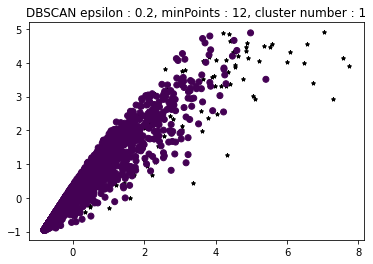

In [57]:
epsilon = 0.2
cluster_arr, cluster_num = db_scan_algorithm(data_frame_transformed, epsilon, min_pts)
print("Number of cluster detected: ", cluster_num - 1)
draw_plot(cluster_arr, cluster_num, epsilon, min_pts)

# Hierarchical Clustering

In [60]:
def hierarchical(method, metric):
    data_dist = pdist(data_frame_transformed, metric=metric)
    data_link = linkage(data_dist, method=method, metric=metric)
    dendrogram(data_link, truncate_mode='lastp')

    max_d = 0.7*max(data_link[:,2])
    app = fcluster(data_link, max_d, criterion='distance')
    print(np.unique(app, return_counts=True))

Some examples of hierarchical function application.

(array([1, 2], dtype=int32), array([4157,    1]))


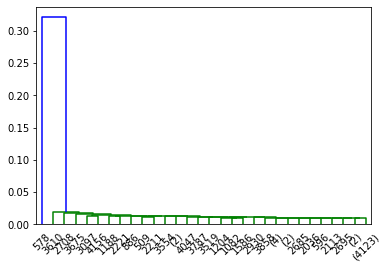

In [61]:
hierarchical(method='single', metric='cosine')

(array([1, 2, 3, 4], dtype=int32), array([ 109, 3623,  314,  112]))


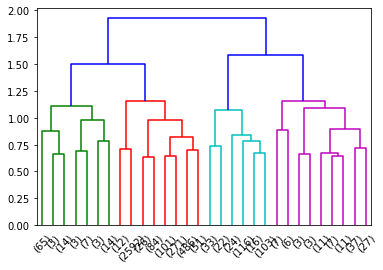

In [62]:
hierarchical(method='complete', metric='euclidean')

(array([1, 2, 3], dtype=int32), array([   3,  433, 3722]))


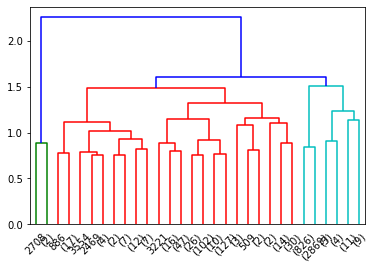

In [63]:
hierarchical(method='average', metric='cityblock')

(array([1, 2], dtype=int32), array([2840, 1318]))


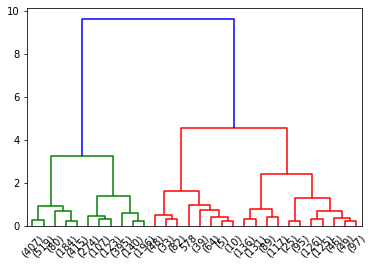

In [64]:
hierarchical(method='ward', metric='cosine')